# Анализ рынка компьютерных игр

Дана следующая вводная: 

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Приступим. Но предварительно импортируем необходимые нам библиотеки для удобства.

## Изучение предоставленной для анализа информации

Для начала, откроем сам csv файл с данными и сохраним его в переменную df:

In [3]:
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.info() #получим информацию о нашем датафрейме

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


In [5]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
df.describe()


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

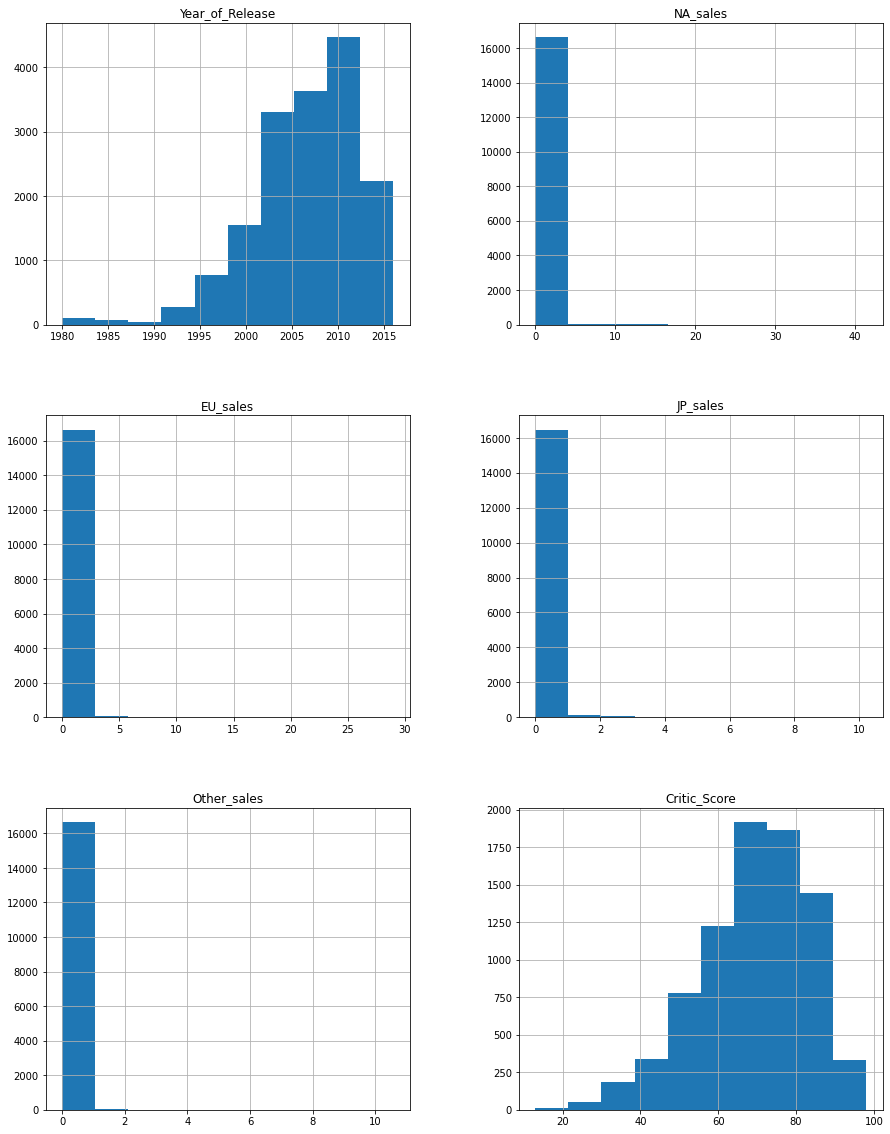

In [10]:
df.hist(figsize = (15, 20))

Теперь мы имеем представление о том, как выглядит наш датасет:
- датасет состоит из 16175 строк (игр)
- в датасете имеются пропуски - достаточно много значений пропущено в столбцах с оценками и рейтингом
- названия столбцов датасета начинаются с заглавной буквы - для написания кода это не очень удобно
- полных дубликатов строк в датасете нет
- типы данных в столбцах год, оценка критиков, рейтинг также некорректны - это тоже необходимо исправить

Для корректного анализа данные необходимо предобработать.

## Предобработка данных

### Приведение столбцов к нижнему регистру

Приведем все названия столбцов к единому регистру - будем для удобства обращения использовать нижний регистр.

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Как видим - названия столбцов теперь в нижнем регистре. Перейдем к преобразованию типов данных.

### Преобразование типов данных

Для получения информации о типах данных в датафрейме примененим метод dtypes.

In [13]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Исходя из примененного метода, видим, что столбец "год релиза" - вещественное число (с точкой), его необходимо поменять в целое. Также необходимо изменить тип значений в столбце "оценка пользователей" на float, т.к. оценка должна быть дробной/целой, но не строкой. С типами данных в остальных столбцах все в порядке - продажи миллионов копий действительно нагляднее выглядят, как вещественные числа. Начнем с замены в столбце "год релиза" с float на int.

In [14]:
df['year_of_release'].unique() #предварительно проверим какие значения есть в столбце "год релиза"

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Для того, чтобы во время перевода в int не возникала ошибка из-за наличия NaN, удалим строки, содержащие эти пропуски в годе релиза. Год релиза из предоставленных данных мы ничем заменить так или иначе не сможем.

In [15]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

269 пропусков составляют всего 1,4% от 16714 значений во всем датафрейме, так что на дальнейший анализ это не повлияет.

In [16]:
df = df[df["year_of_release"].notna()]
df['year_of_release'] = df['year_of_release'].astype('int')

In [17]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16446 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16444 non-null  object 

 1   platform         16446 non-null  object 

 2   year_of_release  16446 non-null  int64  

 3   genre            16444 non-null  object 

 4   na_sales         16446 non-null  float64

 5   eu_sales         16446 non-null  float64

 6   jp_sales         16446 non-null  float64

 7   other_sales      16446 non-null  float64

 8   critic_score     7983 non-null   float64

 9   user_score       9839 non-null   object 

 10  rating           9768 non-null   object 

dtypes: float64(5), int64(1), object(5)

memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Значения приведены к целым числам. Перейдем к столбцу "оценка пользователей". Но, для начала обработаем значения tbd из этого столбца. Это не пропуск - данная аббревиатура означает, что рейтинг игры не определен, соответственно, чтобы не обнулять рейтинги и не оказывать влияние на дальнейший анализ, сделаем неопределенные рейтинги равными -1. Данная операция поможет избавиться от ошибки при переводе типа данных в этом столбце.

In [18]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [19]:
df['user_score'] = df['user_score'].astype('float', errors='ignore')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16446 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16444 non-null  object 

 1   platform         16446 non-null  object 

 2   year_of_release  16446 non-null  int64  

 3   genre            16444 non-null  object 

 4   na_sales         16446 non-null  float64

 5   eu_sales         16446 non-null  float64

 6   jp_sales         16446 non-null  float64

 7   other_sales      16446 non-null  float64

 8   critic_score     7983 non-null   float64

 9   user_score       9839 non-null   float64

 10  rating           9768 non-null   object 

dtypes: float64(6), int64(1), object(4)

memory usage: 1.5+ MB


Значения интересующих нас столбцов измененеы. Далее займемся пропусками.

### Обработка пропущенных значений

Посчитаем количество пропусков по каждому столбцу датафрейма.

In [21]:
df.isna()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


In [22]:
len(df.isna())

16446

In [23]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Рассмотрим полученную информацию:
- 2 значения пропущены в столбце с названием игры - их мы менять не будем, т.к. количество незначительное, а названия мы наврядли сможем узнать. Эти строки удалим полностью;
- 2 пропуска в жанре игры также не заменить - удалим эти строки полностью;
- 7236, 6701 пропущенных значений в оценке от критиков и пользователей уже более критичны для общего анализа. Эти строки отбросить нельзя, а усреднить/заполнить медианным значением также некорректно - поэтому оставим пропуски здесь на своих местах;
- 6716 пропущенных значений рейтинга заменим значением "NR" (not-rated), чтобы эти пропуски не влияли на наш дальнейший анализ

В целом, если посмотреть выше на применение метода isna(), можно сказать, что основные пропущенные значения - это значения в оценках и рейтингах. Можно предположить, что есть игры, которым не давали оценки ни критики, ни пользователи - такая ситуация возможна, особенно, если брать во внимание то, что чаще всего это игры, выпущенные до 2000 года. Например, когда в 85 году вышел Марио, системы оценки по типу Метакритики еще попросту не существовало, равно как и системы рейтинга, что объясняет пропуски в интересующих нас колонках.

Теперь же приступим к работе с пропусками. Начнем с удаления строк с пропущенными значениями.

Начнем с пропусков в названии игры. Индексы будем перезаписывать.

In [24]:
df = df.dropna(axis =0, subset=['name'])
df = df.reset_index(drop=True)

Удалим строки с пропущенным жанром игры.

In [25]:
df = df.dropna(axis =0, subset=['genre'])
df = df.reset_index(drop=True)

Перейдем к пропускам в рейтингах - заполним их значением NR, как и говорилось выше. Это позволит избежать искажения при последующем анализе.

In [26]:
df['rating'] = df['rating'].fillna('NR')

Проверим проделанные действия.

In [27]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Как видим - остались пропуски только в тех столбцах, которые нас интересуют. При этом количество пропущенных значений в остальных столбцах также сократилось - отсюда делаем вывод, что строки удалились корректно.

С аббревиатурой "tbd" мы разобрались на предыдущем шаге. Стоит повториться, что данная аббревиатура означает, что оценка игры неопределена. Поэтому, чтобы не усреднять или обнулять оценки, мы заменили все значения tbd на -1, что позволило нам в предыдущем шаге привести значения столбца "оценка пользователей" к типу float для дальнейшего корректного анализа.

С пропусками разобрались. Перейдем к добавлению нового столбца по суммарным продажам.

### Суммарные продажи по всем регионам

Нам необходимо добавить новый столбец, в котором для каждой игры будет отображаться сумма всех проданных во всех доступных для анализа регионах копий. Назовем этот столбец "total_sales".

Вставим новый столбец с помощью метода insert() после всех столбцов с продажами - для наглядности.

In [28]:
df.insert(loc = 8, column = 'total_sales', value= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'])

In [29]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NR
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NR
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NR


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16444 entries, 0 to 16443

Data columns (total 12 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16444 non-null  object 

 1   platform         16444 non-null  object 

 2   year_of_release  16444 non-null  int64  

 3   genre            16444 non-null  object 

 4   na_sales         16444 non-null  float64

 5   eu_sales         16444 non-null  float64

 6   jp_sales         16444 non-null  float64

 7   other_sales      16444 non-null  float64

 8   total_sales      16444 non-null  float64

 9   critic_score     7983 non-null   float64

 10  user_score       9839 non-null   float64

 11  rating           16444 non-null  object 

dtypes: float64(7), int64(1), object(4)

memory usage: 1.5+ MB


Столбец с общим количеством проданных копий успешно создан - также проверили, что тип значений в нем float, как и в остальных столбцах с количеством проданных копий.

In [31]:
df['total_sales'].describe()#вызовем метод describe, чтобы проверить значения столбца общих продаж на неотрицательность.

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Минимальное число общих проданных копий -4, но такое просто невозможно. Заменим эти данные на 0, чтобы в дальнейшем анализе это не вызывало проблем.

In [32]:
df.loc[df['user_score'] < 0, 'user_score'] = 0

In [33]:
df['total_sales'].describe()#проверим заменились ли значения

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Значения поменялись - перейдем к исследовательскому анализу данных.

## Исследовательский анализ данных

### Выпуск игр по годам

Рассмотрим сколько игр было выпущено в разные годы.

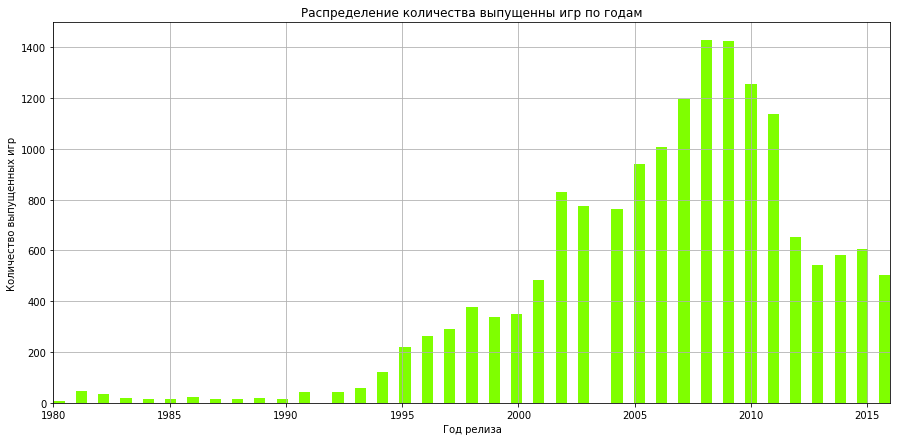

In [34]:
df['year_of_release'].hist(bins = 75, figsize = (15, 7), grid = True, color='#7FFF00')
plt.xlim(1980, 2016)
plt.title('Распределение количества выпущенны игр по годам')
plt.xlabel('Год релиза') 
plt.ylabel('Количество выпущенных игр')
plt.show()



Как мы видим из графика - пик выхода свежих игр приходится на 2007 - 2010 года. Для дальнейшего анализа данные за все время использовать не потребуется - возьмем срез с 2007 по 2016 год. Это будет наиболее наглядно.

### Изменение продаж по платформам

Рассмотрим суммарные продажи по всем платформам, чтобы выделить лидеров. Для этого сгруппируем столбцы с названиями платформ и общих продаж по платформам, отсортировав значения от более крупных к более мелким. Таким образом выведем 5 наиболее поплуярных за все время платформ.

In [35]:
grouped_df = df[["platform", "total_sales"]].groupby(by=["platform"],
                                             as_index=False)\
                                            .sum()\
                                            .sort_values(by=["total_sales"],
                                                         ascending=False)

grouped_df.head()


,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Как мы видим из полученной таблицы - лидерами по количеству проданных копий являются платформы PS2, Xbox360, PS3, Wii, PS.

Создадим список с этими платформами и построим гистограмму по всем из них на одном поле, чтобы наглядно увидеть распределение продаж игр по каждому году. Будем использовать сводную таблицу для группировки и построения гистограммы.

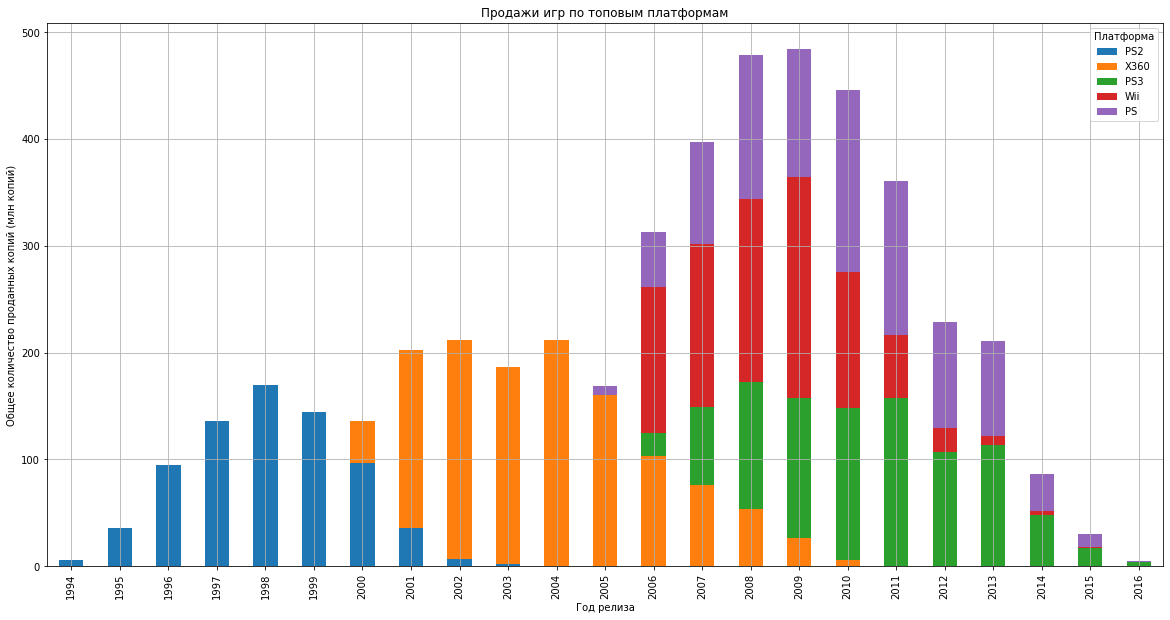

In [36]:
consoles = ['PS2', 'X360', 'PS3', 'Wii', 'PS']

df[df["platform"].isin(consoles)].pivot_table(index=["year_of_release"],
                                              columns=["platform"],
                                              values=["total_sales"],
                                              aggfunc="sum",
                                              fill_value=0)\
                                 .plot\
                                 .bar(figsize=(20,10), stacked=True, grid=True)
plt.xlabel('Год релиза')
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.title('Продажи игр по топовым платформам')
plt.legend(consoles, title='Платформа')
plt.show()


Как мы видим из данной таблицы - каждая платформа имеет свой пик популярности, а затем сходит на нет - т.е. можно сказать, что продажи распределены нормально. А что насчет сроков появления новых игровых платформ и смены одних на другие? Для этого построим график продажи игр по всем консолям за все года - так будет нагляднее видеть сколько в среднем живет одна платформа и как часто появляются новые.

Также будем использовать сводную таблицу общего количества проданных копий, сгруппированную по годам выхода тайтлов. Линиями графиков будут являться непосредственно платформы, на которые эти тайтлы выходили.

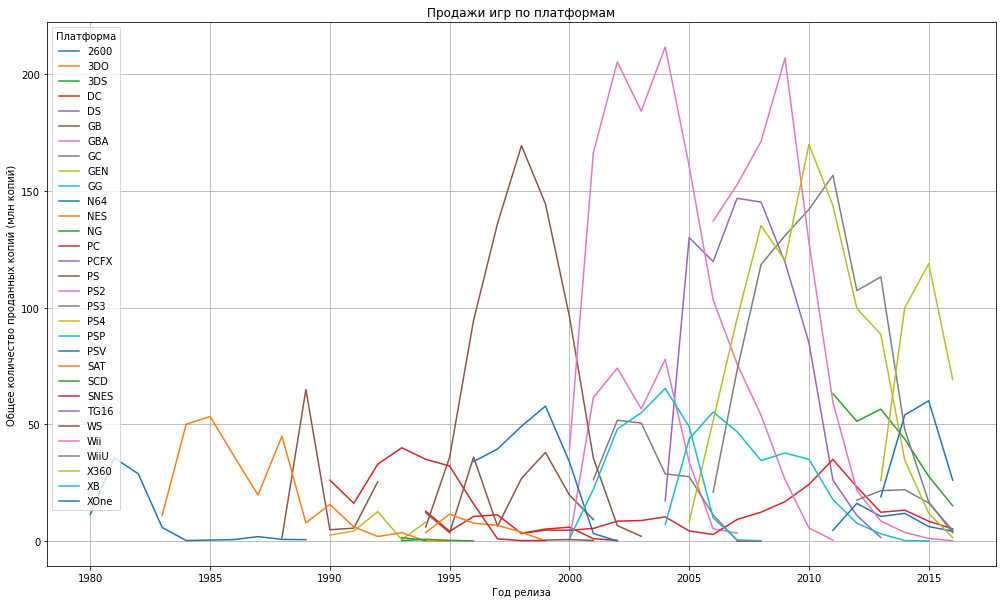

In [37]:
df.query('1980 <= year_of_release <= 2016').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    figsize=(17,10), grid=True)
plt.xlabel('Год релиза')
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.title('Продажи игр по платформам')
plt.legend(title='Платформа')
plt.show()



Как мы видим из графика - срок жизни одной платформы, в среднем, составляет около 5-6 лет. Но здесь важно отметить, что в 80-е, 90-е годы, ввиду не сильно развитых технологий, новые платформы появлялись реже - например, NES от Nintendo существовала около 10 лет, а затем, когда новые поколения платформ стали выходить чаще, график часто меняется. Единственная платформа, которая примерно придерживается линии - это ПК, ведь, дейтсвительно, персональные компьютеры с нами давно и улучшаются с каждым годом.

Займемся данными за актуальный период.

### Анализ актуальных платформ 

В прошлом шаге мы выделили наиболее прибыльные платформы - но являтся ли они актуальными? Рассмотри сводную таблицу заново.

In [38]:
grouped_df = df[["platform", "total_sales"]].groupby(by=["platform"],
                                             as_index=False)\
                                            .sum()\
                                            .sort_values(by=["total_sales"],
                                                         ascending=False)

grouped_df.head(20)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Как мы видим - в лидерах все те же платформы (PS2, Xbox360, PS3, Wii, PS), но давайте посмотрим график продаж по всем платформам за все года из шага выше. На нем видно, что чем год ближе к настоящему, тем чаще выходят новые консоли. Действительно, за 10 лет существования PS на нее продано больше игр, чем за 2 года существования PS4. Отсюда и появились наши лидеры по продажам. 

Из предыдущего шага и графика видно, что средний срок роста и пика платформ достигает 3-4 лет. Возьмем за актуальный период для анализа срок в 4 года - итого наш период для прогноза продаж в 2017 году будет с 2013 по 2016 гг. (а 4-й 2017 год актуального периода как раз и будет прогнозируемым).

Построим сводную таблицу, а по ней диаграмму продаж игр по актуальным платформам. 

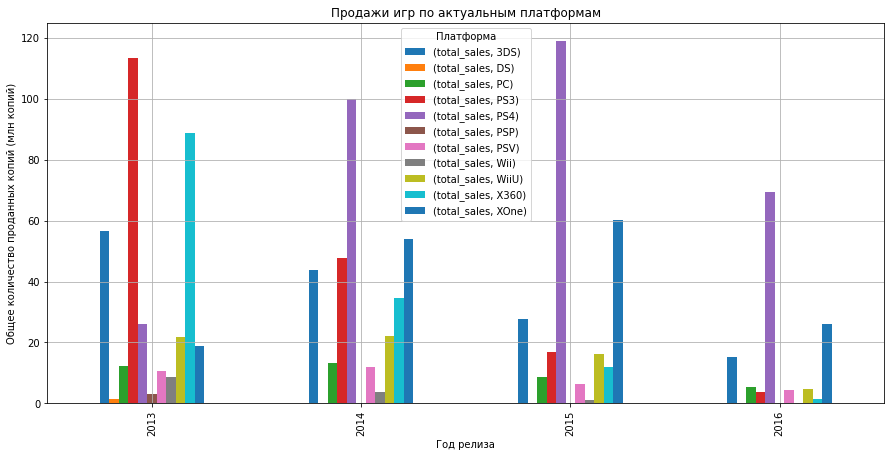

In [39]:
df.query('2013 <= year_of_release <= 2016').pivot_table(index=["year_of_release"],
                                              columns=["platform"],
                                              values=["total_sales"],
                                              aggfunc="sum").plot.bar(figsize=(15,7), grid=True)
plt.xlabel('Год релиза')
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.title('Продажи игр по актуальным платформам')
plt.legend(title='Платформа')
plt.show()

На графике видно, что в топе по количеству проданных тайтлов находятся консоли PlayStation 4 и XBox One. Чуть меньше, но по-прежнему поддерживается, у консоли 3Ds от Nintendo. На спад ушли продажи игр для PlayStation 3 и XBox 360 - их заменили свежие консоли нового поколения. У PC ситуация в целом стабильна - за последние 3 года игр мало, но они продаются. Итого получаем, что актуальные платформы для актуального периода - это PS4 и XBox One.

Создадим новую переменную - act_df для удобства. Составим "ящик с усами" (диаграмму boxplot) и выведем ее описание.

In [40]:
act_consoles = ['PS4', 'XOne']
act_df = df[df["platform"].isin(act_consoles)].query('2013 <= year_of_release <= 2016')

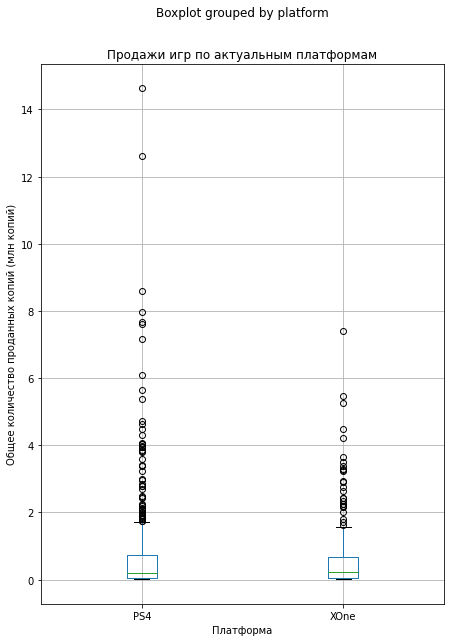

In [41]:
act_df.boxplot(figsize=(7,10), column='total_sales', by='platform')
                                              
                                 
plt.xlabel('Платформа')
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.title('Продажи игр по актуальным платформам')
plt.show()

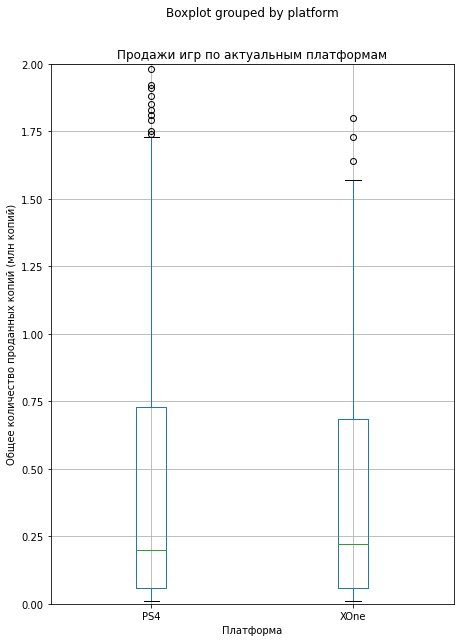

In [43]:
act_df.boxplot(figsize=(7,10), column='total_sales', by='platform')
plt.ylim(0,2) #в более крупном мастштабе                                                                              
plt.xlabel('Платформа')
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.title('Продажи игр по актуальным платформам')
plt.show()

Также создадим сводную таблицу и выведем ее описание для более полной картины.

In [41]:
act_df.pivot_table(index=["year_of_release"],
                                              columns=["platform"],
                                              values=["total_sales"],
                                              aggfunc="sum").describe()

total_sales           
platform         PS4       XOne
count       4.000000   4.000000
mean       78.535000  39.830000
std        40.567917  20.313977
min        25.990000  18.960000
25%        58.435000  24.352500
50%        84.625000  40.110000
75%       104.725000  55.587500
max       118.900000  60.140000

На графике заметны выбросы - оговоримся сразу, что такое возможно (выход какого-либо тайтла может быть сверхуспешным, тем более на консолях нового поколения) и мы удалять эти выбросы не будем.

Таким образом, по количеству проданных игр лидирует PS4 от Sony - 118,9 млн копий против 60,1 у Xbox One. В среднем, PS4  также опережает Xbox One больше, чем в 2 раза по количеству проданных на нее тайтлов - 78,5 млн против 39,8 млн копий. Это говорит о безусловно большей популярности консоли от Sony среди геймеров по всему миру, а таже о большем количестве эксклюзивов, вышедших именно на эту консоль. По остальным данным также видно, что PlayStation 4 опережает своего конкурента от Microsoft в 2 раза. На первый взгляд, если смотреть на графики boxplot, кажется, что показатели обеих консолей равны, но если приглядеться к значениям выбросов, то будет понятно, что продажи игр на PS4 лидируют ввиду того, что на эту консоль элементарно вышло больше эксклюзивных тайтлов.

А как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Для этого возьмем самую популярную, исходя из нашего анализа, платформу - Sony PlayStation 4, и построим по ней диаграмму рассеивания, а затем посчитаем корреляцию. Диаграмму будем строить с использованиеи scatter.

Для начала построим распределения зависимости количества проданных игр от оценки критиков. А затем построим то же самое распределение, но от оценки пользователей. Также рассчитаем корреляцию между количеством проданных копий и оценками (критиков и пользователей).

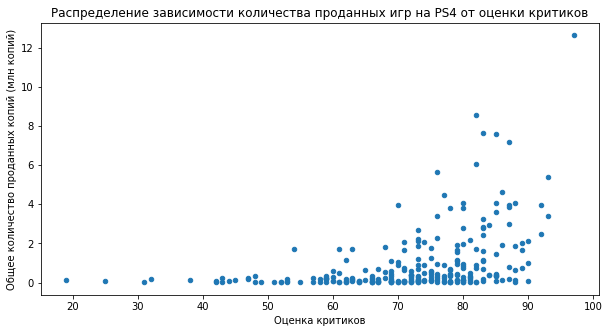

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [42]:
df[df['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на PS4 от оценки критиков')
plt.xlabel('Оценка критиков') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df['critic_score'].describe()


In [43]:
df[df['platform']=='PS4']['total_sales'].corr(df['critic_score'])#рассчитаем корреляцию 

0.406567902061781

Из полученного нами графика, а также рассчитанного коэффициента корреляции (0,41) можно сделать вывод, что прослеживается зависимость количества проданных копий игр на консоль PS4 от оценки данных игр критиками. Так, можно сказать, что чем выше игра получила оценку у критиков, тем больше ее покупают. Но на то они и критики - а что с зависимостью от оценки пользователей? Построим аналогичную диаграмму рассеивания и рассчитаем корреляцию.

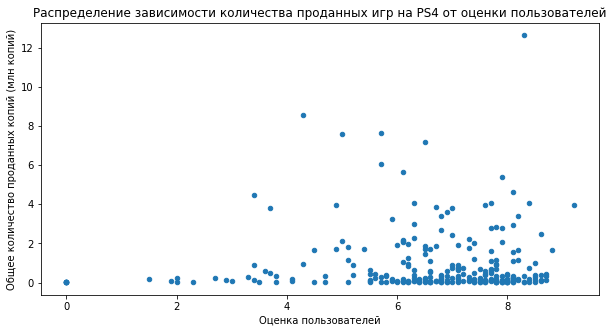

count    9839.000000
mean        5.405407
std         3.317917
min         0.000000
25%         2.400000
50%         6.900000
75%         8.000000
max         9.700000
Name: user_score, dtype: float64

In [44]:
df[df['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на PS4 от оценки пользователей')
plt.xlabel('Оценка пользователей') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df['user_score'].describe()

In [45]:
df[df['platform']=='PS4']['total_sales'].corr(df['user_score'])#также рассчитаем корреляцию

0.02327930096361034

Здесь все немного иначе. Коэффициент корреляции тут очень мал (0,02). На основании этих данных можно сделать вывод, что между оценками пользователей и количеством проданных копий игр практически отсутствует. Если разобраться - это действительно так, ведь оценки пользователей смотрят не все, а также они весьма субъективны. Отсюда и такая незначительная зависимость.

Для сравнения посмотрим на аналогичные графики и коэффициенты корреляции у других платформ - возьмем, для примера, Xbox One и PS3.

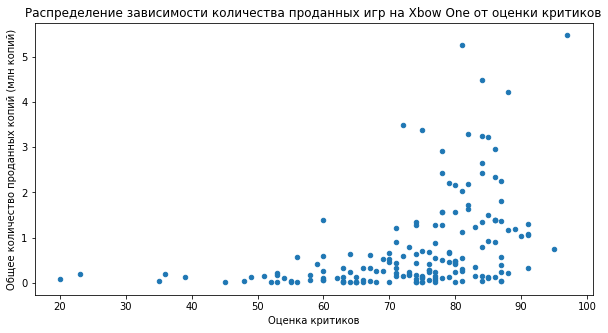

0.41699832800840175

In [46]:
df[df['platform']=='XOne'].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на Xbow One от оценки критиков')
plt.xlabel('Оценка критиков') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df[df['platform']=='XOne']['total_sales'].corr(df['critic_score'])#рассчитаем корреляцию 


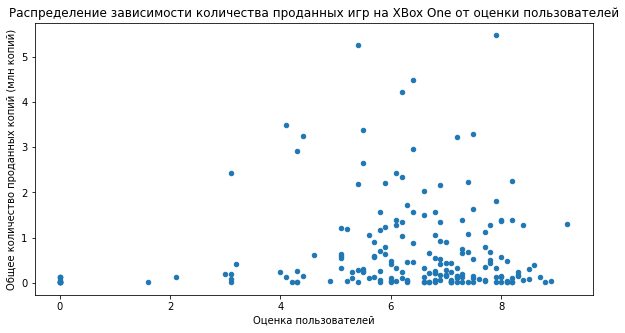

0.07448560742246758

In [47]:
df[df['platform']=='XOne'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на XBox One от оценки пользователей')
plt.xlabel('Оценка пользователей') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df[df['platform']=='XOne']['total_sales'].corr(df['user_score'])#рассчитаем корреляцию 

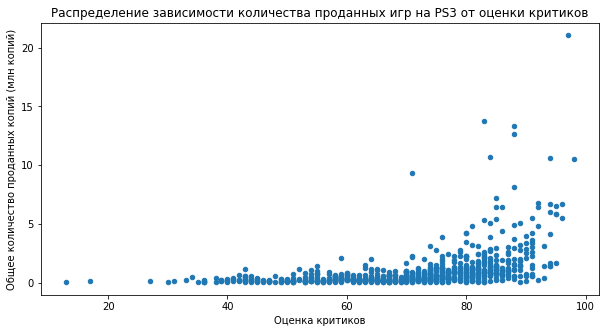

0.4327589578997135

In [48]:
df[df['platform']=='PS3'].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на PS3 от оценки критиков')
plt.xlabel('Оценка критиков') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df[df['platform']=='PS3']['total_sales'].corr(df['critic_score'])#рассчитаем корреляцию 

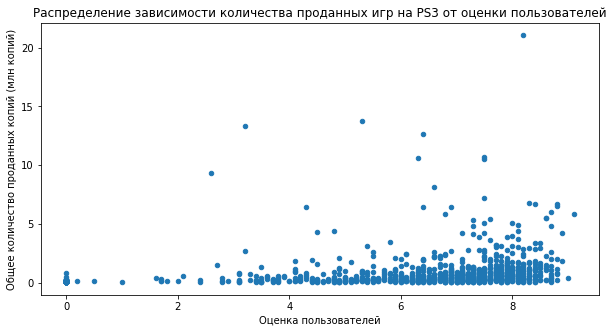

0.1999619571554818

In [49]:
df[df['platform']=='PS3'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(10, 5))
plt.title('Распределение зависимости количества проданных игр на PS3 от оценки пользователей')
plt.xlabel('Оценка пользователей') 
plt.ylabel('Общее количество проданных копий (млн копий)')
plt.show()
df[df['platform']=='PS3']['total_sales'].corr(df['user_score'])#рассчитаем корреляцию 

Как видим из полученных данных - ситуации схожие. Между оценкой критиков и количиством проданных копий игр по выбранным платформам взаимосвязь прослеживается достаточно сильно, а между оценкой пользователей и количеством проданных копий - она мала.

Теперь посмотрим на распределения игр по жанрам и узнаем какие из них самые прибыльные. Выберем актуальный период и сгруппируем данные по жанру. Затем найдем медианное значение для этих данных и по нему построим круговую диаграмму. Также выведем описание данных методом describe(). 

total_sales                                                      
                   count      mean       std   min   25%    50%     75%    max
genre                                                                         
Action             766.0  0.420196  1.253909  0.01  0.03  0.110  0.3375  21.05
Adventure          245.0  0.096490  0.216445  0.01  0.02  0.030  0.0700   1.66
Fighting            80.0  0.441375  1.048883  0.01  0.06  0.125  0.3225   7.55
Misc               155.0  0.405290  1.007985  0.01  0.03  0.100  0.3300   9.18
Platform            74.0  0.576081  0.806808  0.01  0.09  0.225  0.6275   4.32
Puzzle              17.0  0.186471  0.325172  0.01  0.02  0.060  0.1100   1.19
Racing              85.0  0.469294  0.964101  0.01  0.05  0.120  0.3800   7.09
Role-Playing       292.0  0.499623  1.353164  0.01  0.06  0.125  0.3825  14.60
Shooter            187.0  1.245882  2.014107  0.01  0.14  0.450  1.4250  14.63
Simulation          62.0  0.350968  0.849163  0.01  0.03  0.100  0.2950   5.22
Sports             214.0  0.703972  1.219237  0.01  0.07  0.240  0.7650   8.58
Strategy            56.0  0.180000  0.279441  0.01  0.04  0.080  0.2325   1.67

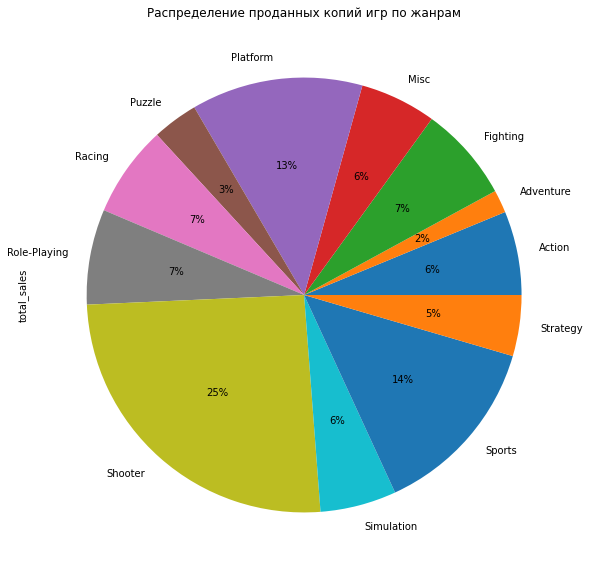

In [50]:
df.query('2013 <= year_of_release <= 2016').groupby(['genre']).median().plot(kind='pie', y='total_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по жанрам', figsize = (15,10), legend = False)
df.query('2013 <= year_of_release <= 2016').groupby(['genre'])[['total_sales']].describe()

Из построенной диаграммы и таблицы описания средних значений столбца "общие продажи", сгруппированного по жанрам, видно, что самые популярные жанры - шутеры (их средние продажи 1,24 млн копий), спорт-симуляторы (0,7 млн проданных копий) и платформеры(с 0,57 млн проданных копий в среднем). Наименьшей популярностью пользуются стратегии (0,18 млн), паззлы 0,186 млн копий) и приключения(0,09 млн проданных копий).

Таким образом, мы выделили следующие моменты:
- Пик выхода игр пришелся на 2007-2010 гг.
- Наиболее популярными консолями за все время существования являются PS2, Xbox360, PS3, Wii, PS
- Актуальными на данный момент консолями являются PS4 и XBox One
- Актуальным периодом для анализа был выбран 2013 - 2016 гг. (последние 4 года отражают взаимосвязи наиболее четко, а 4-й год как раз 2017-й - наш прогнозируемый)
- Пользователи берут во внимание оценку тайтлов от критиков более охотно, нежели оценку других пользователей (об этом нам говорят диаграммы рассеивания и коэффициент корреляции - почти 0,5 по зависимости количества проданных копий игр от оценки критиков против примерно 0,02 от оценки других пользователей)
- Наиболее прибыльные (продаваемые) жанры игр - шутеры, спортивные симуляторы, платформеры. Самые низкопродаваемые - стратегии, паззлы, приключения.

Перейдем к составлению портрета типичного пользователя.

## Портрет пользователя

Нам необходимо составить портрет типичного пользователя для каждого из регионов - Северная Америка, Европа и Япония. Для пользователя необходимо определить:
- Самые популярные платформы (топ-5), а также описать различия в долях продаж
- Самые популярные жанры (топ-5) и пояснить разницу.
- Ответить на вопрос - влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнем с региона Северная Америка.

### Северная Америка

Для анализа будем использовать данные за актуальный период, выделенный выше (2013 - 2016 гг.), так как это даст нам, соответственно, актуальную информацию о популярных платформах и жанрах.

Создадим переменную "топ платформ в Северной Америке" - построим сводную таблицу, а затем для наглядности график. Передадим как индекс - платформу, а как значения - продажи по Северной Америке, применив сумму (для нахождения общего количества проданных копий). Отсортируем значения в порядке убывания и выведем топ-5 платформ.

In [51]:
df_act = df.query('2013 <= year_of_release <=2016')
na_top_plt = df_act.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = ['na_sales'], ascending=False)
na_top_plt.head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Text(0, 0.5, 'Количество проданных игр')

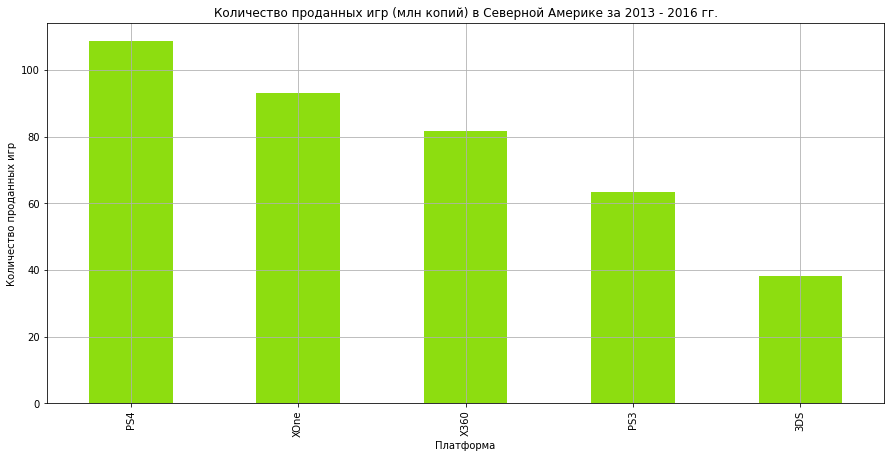

In [52]:
na_top_plt.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#8DDD10')
plt.title('Количество проданных игр (млн копий) в Северной Америке за 2013 - 2016 гг.')
plt.xlabel('Платформа') 
plt.ylabel('Количество проданных игр')

График показывает, что топовые платформы для Америки - PlayStation 4, XBox One, XBox 360, PlayStation 3, Nintendo 3DS, . Самой популярной у американцев является консоль PS4 - на нее продано почти 109 млн копий игр. Далее идет XBox One - 93,1 млн копий. Затем XBox 360 - платформа предыдущего поколения с 81,6 млн копий игр. Потом PS3 - также платформа предыдущего поколения, но тем не менее популярная у американцев (63,5 млн проданных копий игр). Замыкает пятерку Nintendo 3Ds  - тоже весьма старая консоль, с проданными 38,2 млн копий игр на нее.

Теперь посчитаем какую долю составляет количество продаж по каждой платформе от суммарного количества продаж по всей Северной Америке. Для этого создадим переменную "total_na", куда запишем сумму всего столбца "na_sales" датафрейма. Затем разделим сумму продаж по каждой консоли из нашей топовой пятерки на новую переменную.

Общее количество проданных игр для Северной Америки составляет 437.71 млн копий, при этом:

-Доля проданных игр на PlayStation 4 составляет 24.8% от общего количества проданных копий игр;

-Доля проданных игр на XBox One составляет 21.3% от общего количества проданных копий игр;

-Доля проданных игр на XBox 360 составляет 18.7% от общего количества проданных копий игр;

-Доля проданных игр на PlayStation 3 составляет 14.499999999999998% от общего количества проданных копий игр;

-Доля проданных игр на Nintendo 3Ds составляет 8.7% от общего количества проданных копий игр.


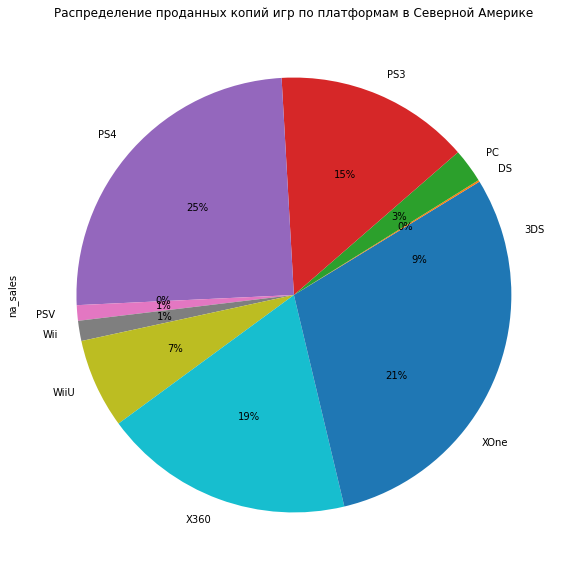

In [53]:
df_act.groupby(['platform']).sum().plot(kind='pie', y='na_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по платформам в Северной Америке', figsize = (10,10), legend = False)

total_na = df_act['na_sales'].sum()
print(f'Общее количество проданных игр для Северной Америки составляет {total_na} млн копий, при этом:')

na_ps4_part = (108.74 / total_na).round(3)*100
print(f'-Доля проданных игр на PlayStation 4 составляет {na_ps4_part}% от общего количества проданных копий игр;')

na_xone_part = (93.12 / total_na).round(3)*100
print(f'-Доля проданных игр на XBox One составляет {na_xone_part}% от общего количества проданных копий игр;')

na_xb_part = (81.66 / total_na).round(3)*100
print(f'-Доля проданных игр на XBox 360 составляет {na_xb_part}% от общего количества проданных копий игр;')

na_ps3_part = (63.50 / total_na).round(3)*100
print(f'-Доля проданных игр на PlayStation 3 составляет {na_ps3_part}% от общего количества проданных копий игр;')

na_3ds_part = (38.20 / total_na).round(3)*100
print(f'-Доля проданных игр на Nintendo 3Ds составляет {na_3ds_part}% от общего количества проданных копий игр.')



Итого получается, что по сути на североамериканском рынке преобладают 3 консоли - японская PlayStation 4 (25%) и две американских от Microsoft - Xbox One (21%) и, его предшественник, XBox 360 (19% рынка). Две оставшееся (Nintendo 3Ds и PlayStation 3) обладают значительно меньшей долей по проданным на них играм (9% и 15% соответственно), но также входят в наш топ-5. Значит, делаем вывод - типичный американский пользователь, скорее всего, играет на приставе от Sony - PS4, либо же на майкрософтовских XBox'ах, а возможно на предшественнице PS4 Playstation 3 или на Nintendo 3Ds (но здесь вероятность гораздо меньше). Продолжим.

Перейдем к топу жанров для Северной Америки. Для этого, аналогично прошлому шагу, построим сводную таблицу и выведем ее на экран вместе с графиком.

In [54]:
na_top_gen = df_act.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = ['na_sales'], ascending=False)
na_top_gen.head(5)# также создадим переменную "топ жанров для СА" и, сгруппировав ее по продажам, выведем на экран



,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Text(0, 0.5, 'Количество проданных игр')

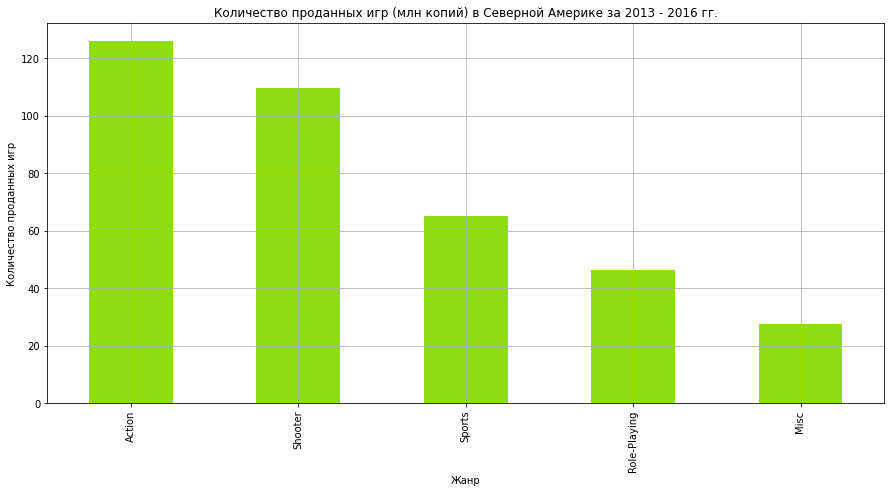

In [55]:
na_top_gen.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#8DDD10')
plt.title('Количество проданных игр (млн копий) в Северной Америке за 2013 - 2016 гг.')
plt.xlabel('Жанр') 
plt.ylabel('Количество проданных игр')

Мы выяснили, что самыми популярными жанрами игр в североамериканском регионе являются экшены, шутеры, спортивные симуляторы, рпг. Такое распределение отвечает требованиям к игре у американского пользователя - игроки из США в основном любят играть в "стрелялки" или спортивные симуляторы, что и подтверждает огромное количество проданных экшн-шутеров и спорт-симов. Получается портрет типичного классического американца, любящего "войнушки" и спорт. Меньшее количество продано аркад и рпг - видимо, как жанр, в Америке они не особо приживаются. Перейдем к системе рейтингов.

Нам необходимо выяснить - влияет ли возрастной рейтинг игры на количество проданных копий. Давайте узнаем игры с каким возрастным рейтингом продаются лучше, а с каким - хуже. Для этого воспользуемся сводной таблицей и построим диаграмму.

Для начала давайте обозначим какие рейтинги ESRB бывают (по материалу из Википедии):
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Также не забудем, что наша переменная "NR"(not-rated) из первого шага (ей мы заменили пропущенные значения) здесь присутствует.

In [56]:
na_top_rate = df_act.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = ['na_sales'], ascending=False)
na_top_rate

,na_sales
rating,
M,165.21
NR,89.42
E,79.05
E10+,54.24
T,49.79


Итого мы видим 5 разновидностей рейтинга, который присваивают играм в нашем датафрейме. Предлагаю для большей наглядности составить столбчатую и круговую диаграммы распределения игр по рейтингу. Это позволит нам нагляднее увидеть лидеров.

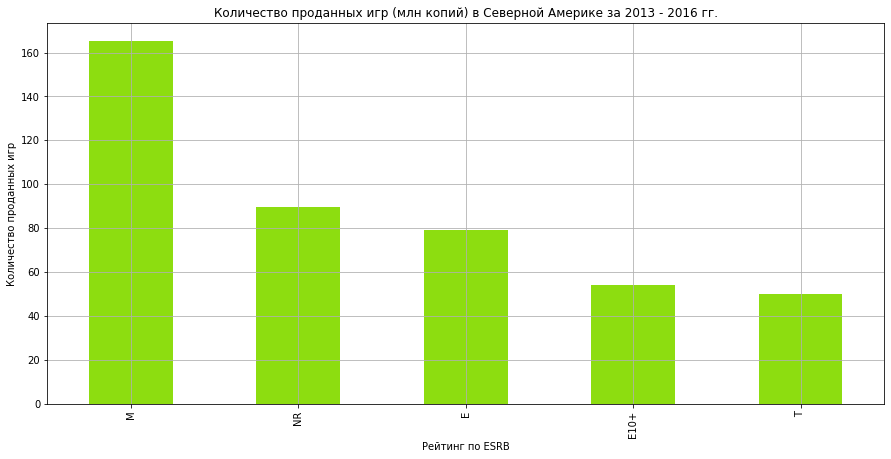

<AxesSubplot:title={'center':'Распределение проданных копий игр по рейтингу ESRB в Северной Америке'}, ylabel='na_sales'>

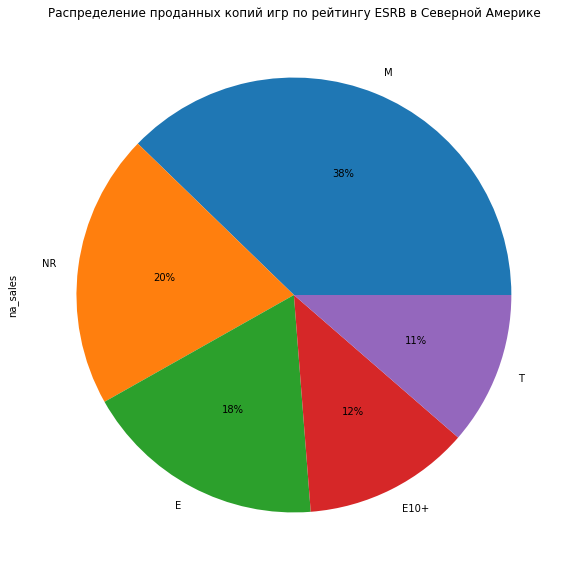

In [57]:
na_top_rate.plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#8DDD10')
plt.title('Количество проданных игр (млн копий) в Северной Америке за 2013 - 2016 гг.')
plt.xlabel('Рейтинг по ESRB') 
plt.ylabel('Количество проданных игр')
plt.show()

na_top_rate.plot(kind='pie', y='na_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по рейтингу ESRB в Северной Америке', figsize = (10,10), legend = False)

Данные графики иллюстрируют, что наибольшее количество проданных игр в Северной Америке представлены рейтингом М (для взрослых) - составляют 38% (165,2 млн проданных копий). Далее идут игры, для которых значение рейтинга пропущено - эти значения составляют 20% всех проданных игр. Затем расположились игры с рейтингом Е (для всех) - 18% и 79,05 млн проданных копий. 12% проданных копий игр (54,2 млн) составляют игры категории Е10+ (для всех старше 10 лет). Самыми малочисленными по объему продаж являются игры для подростков (рейтинг Т) - всего 49,8 млн копий таких игр продано.

Как мы видим из анализа полученных данных - в Северной Америке к рейтингам игр деликатное отношение. Да и сама система возрастного ограничения очень там прижилась. Соответственно, рейтинг оказывает влияние на продажи игр в данном регионе.

Подытожив вышесказанное, можно составить портрет типичного североамериканского пользователя - это человек, играющий на консоли (PS46 Xbox One, XBox 360), которому нравятся жанры экшн-шутеров, либо спортивных симуляторов (реже РПГ), предпочитающий игры рейтинга "для взрослых" (как раз подходит к любви американцев к "стрелялкам"), либо игры рейтинга "для всех" (отлично вписывается в спортивные симуляторы и рпг).

### Европа

Для составления портрета пользователя из европейского региона (а далее - из японского) будем выполнять действия, аналогичные североамериканскому региону.

Создадим переменную "топ платформ в Европе" - построим сводную таблицу, а затем для наглядности график. Передадим как индекс - платформу, а как значения - продажи по Европе, применив сумму (для нахождения общего количества проданных копий). Отсортируем значения в порядке убывания и выведем топ-5 платформ.

In [58]:
eu_top_plt = df_act.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = ['eu_sales'], ascending=False)
eu_top_plt.head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Text(0, 0.5, 'Количество проданных игр')

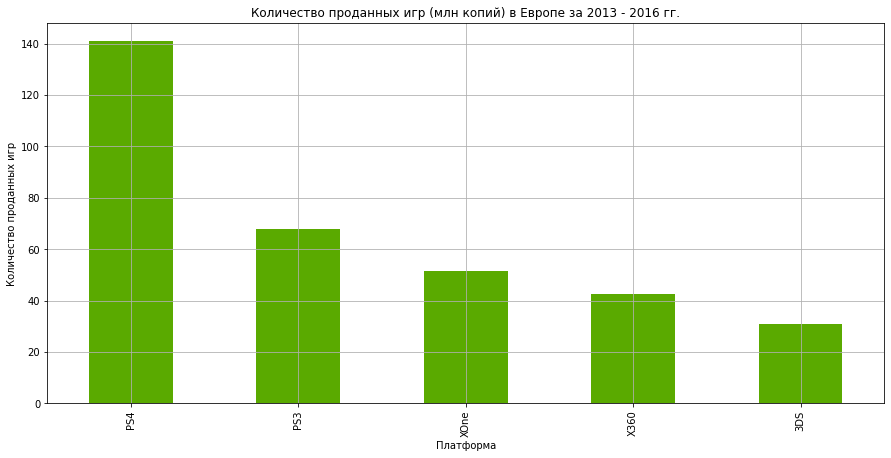

In [59]:
eu_top_plt.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#5AAA00')
plt.title('Количество проданных игр (млн копий) в Европе за 2013 - 2016 гг.')
plt.xlabel('Платформа') 
plt.ylabel('Количество проданных игр')

В Европе пятерка лидеров немного другая. Хотя здесь также отдают предпочтение японской консоли PS4 (141 млн проданных копий игр), на втором месте также японская PS3 с ее 67,81 млн копий тайтлов. Затем идут американские XBox One (51,59 млн проданных копий) и XBox 360 (42,52 млн проданных копий игр). Замыкает рейтинг Nintendo 3Ds (почти 31 млн). Таким образом, можно сказать, что европейский пользователь предпочитает обе японских приставки - и новую PS4, и старую PS3 американским XBox'ам. А что с долями от общего числа продаж?

Аналогично прошлому шагу, создадим переменную "total_eu", куда запишем сумму всего столбца "eu_sales" датафрейма. Затем разделим сумму продаж по каждой консоли из нашей топовой пятерки на новую переменную.

Общее количество проданных игр для Европы составляет 392.23 млн копий, при этом:

-Доля проданных игр на PlayStation 4 составляет 36.0% от общего количества проданных копий игр;

-Доля проданных игр на PlayStation 3 составляет 17.299999999999997% от общего количества проданных копий игр;

-Доля проданных игр на XBox One составляет 13.200000000000001% от общего количества проданных копий игр;

-Доля проданных игр на XBox 360 составляет 10.8% от общего количества проданных копий игр;

-Доля проданных игр на Nintendo 3Ds составляет 7.9% от общего количества проданных копий игр.


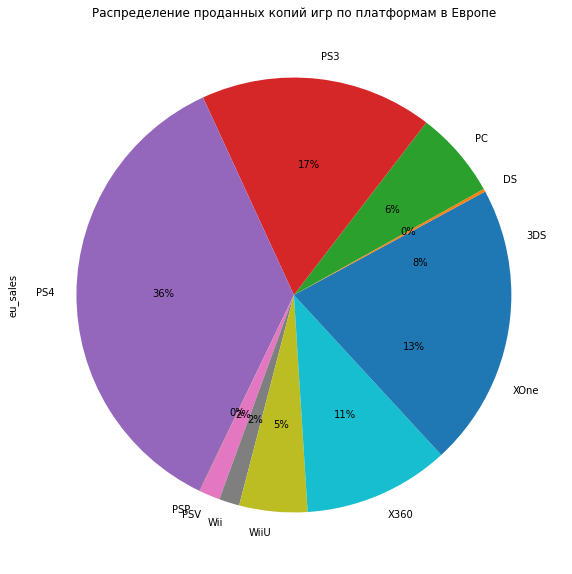

In [60]:
df_act.groupby(['platform']).sum().plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по платформам в Европе', figsize = (10,10), legend = False)

total_eu = df_act['eu_sales'].sum()
print(f'Общее количество проданных игр для Европы составляет {total_eu} млн копий, при этом:')

eu_ps4_part = (141.09 / total_eu).round(3)*100
print(f'-Доля проданных игр на PlayStation 4 составляет {eu_ps4_part}% от общего количества проданных копий игр;')

eu_ps3_part = (67.81 / total_eu).round(3)*100
print(f'-Доля проданных игр на PlayStation 3 составляет {eu_ps3_part}% от общего количества проданных копий игр;')

eu_xone_part = (51.59 / total_eu).round(3)*100
print(f'-Доля проданных игр на XBox One составляет {eu_xone_part}% от общего количества проданных копий игр;')

eu_xb_part = (42.52 / total_eu).round(3)*100
print(f'-Доля проданных игр на XBox 360 составляет {eu_xb_part}% от общего количества проданных копий игр;')

eu_3ds_part = (30.96 / total_eu).round(3)*100
print(f'-Доля проданных игр на Nintendo 3Ds составляет {eu_3ds_part}% от общего количества проданных копий игр.')



Наш типичный европейский пользователь, вероятнее всего, отдает предпочтение консоли от Sony - PlayStation 4, хотя по-прежнему много людей играет и на обоих XBox'ах от Microsoft.

Займемся теперь излюбленными жанрами в Европе. Аналогично прошлому шагу.

In [61]:
eu_top_gen = df_act.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = ['eu_sales'], ascending=False)
eu_top_gen.head(5)#создадим переменную "топ жанров в Европе" и построим сводную таблицу

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Text(0, 0.5, 'Количество проданных игр')

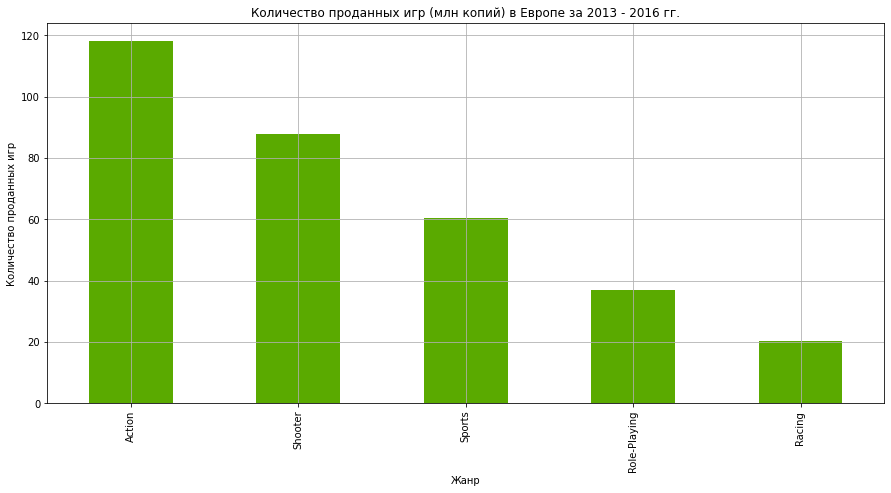

In [62]:
eu_top_gen.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#5AAA00')
plt.title('Количество проданных игр (млн копий) в Европе за 2013 - 2016 гг.')
plt.xlabel('Жанр') 
plt.ylabel('Количество проданных игр')

Здесь ситуация схожа с североамериканским рынком - преобладают экшены (118 млн копий), шутеры (87 млн) и спортивные симуляторы (60 млн проданных копий игр). Но в Европе добавился в топовой пятерке жанр гонок. Судя по всему, европецы действительно любят гонки и охотно покупают (почти 20,2 млн проданных копий игр этого жанра ушло на европейский рынок).

Теперь рассмотрим распределение по рейтингам. Также применим график и круговую диаграмму к сводной таблице.

In [63]:
eu_top_rate = df_act.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = ['eu_sales'], ascending=False)
eu_top_rate #создаем новую переменную и выводим на экран

,eu_sales
rating,
M,145.32
E,83.36
NR,78.91
E10+,42.69
T,41.95


Как видим - ситуация совершенно аналогична североамериканскому рынку.

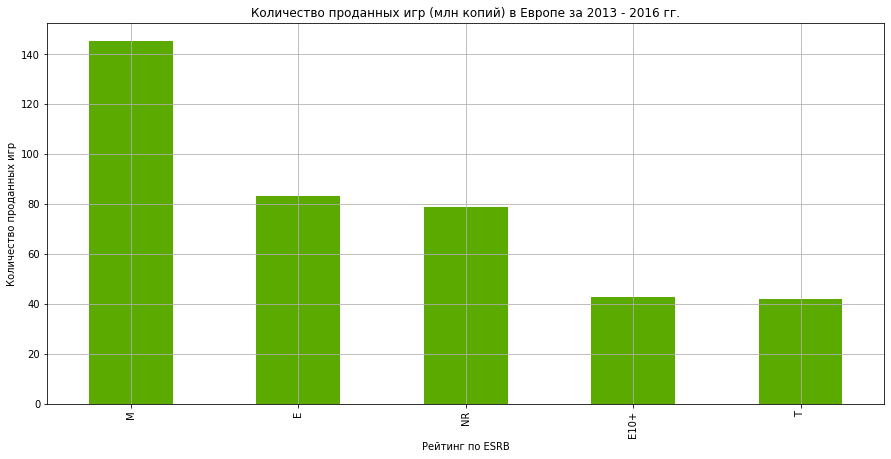

<AxesSubplot:title={'center':'Распределение проданных копий игр по рейтингу ESRB в Европе'}, ylabel='eu_sales'>

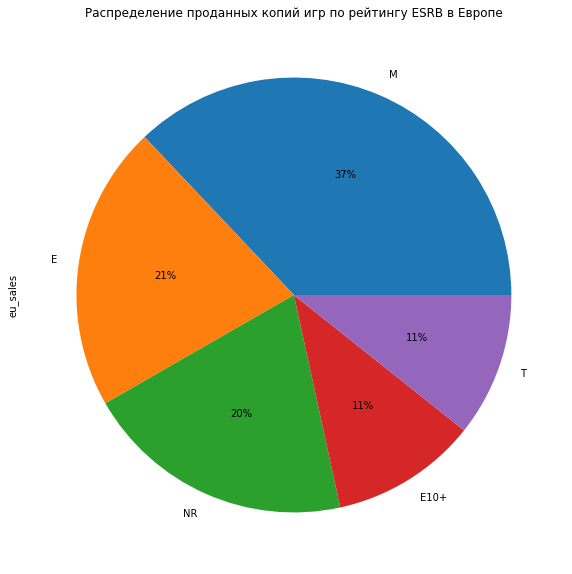

In [64]:
eu_top_rate.plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#5AAA00')
plt.title('Количество проданных игр (млн копий) в Европе за 2013 - 2016 гг.')
plt.xlabel('Рейтинг по ESRB') 
plt.ylabel('Количество проданных игр')
plt.show()

eu_top_rate.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по рейтингу ESRB в Европе', figsize = (10,10), legend = False)

Действительно, распределение примерно одинаковое с Америкой - игры рейтинга М, Е и Т в лидерах, чуть меньший процент приходится на рейтинг Е10+. Также очень много значений пропущено - 20%.

Таким образом, можно сказать, что типичный европейский геймер - это человек, играющий на PS4/3 (реже XBox One/360), любящий экшены, шутеры, спортивные симуляторы, но не обходящий стороной и гонки (в отличие от североамериканского пользователя), покупающий игры преимущественно категории "для взрослых", либо же "для всех" (гораздо меньше - категории "для подростков").

### Япония

Составим топ-5 популярных консолей в Японии.

In [65]:
jp_top_plt = df_act.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = ['jp_sales'], ascending=False)
jp_top_plt.head(5) #создаем переменную "топ японских платформ" с помощью сводной таблицы

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Text(0, 0.5, 'Количество проданных игр')

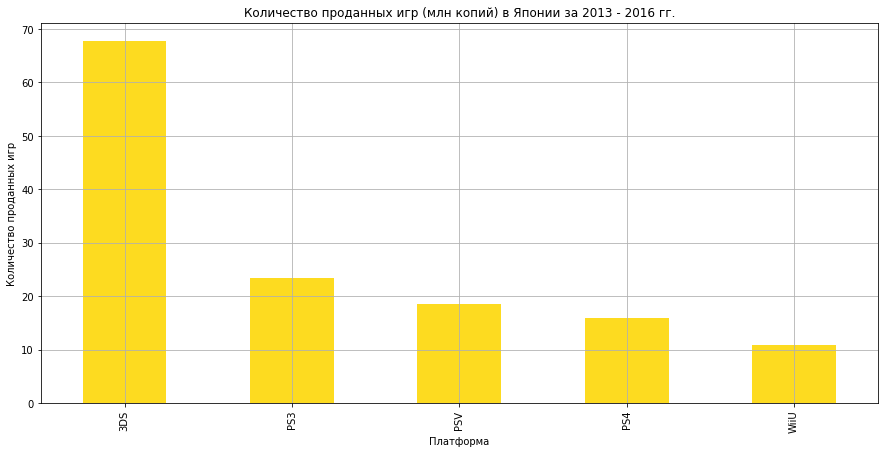

In [66]:
jp_top_plt.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#FDDB20')
plt.title('Количество проданных игр (млн копий) в Японии за 2013 - 2016 гг.')
plt.xlabel('Платформа') 
plt.ylabel('Количество проданных игр')

Несомненно, лидерами японского рынка будут японские консоли - это Nintendo 3Ds (67,8 млн проданных копий игр), PlayStation 3 (23,35 млн проданных копий), портативная приставка PS Vita (18,59 млн), современная PlayStation 4 (15,96 млн) и Nintendo WiiU (почти 11 млн копий игр на нее продано).

Стоит отметить, что японский рынок либо недостаточно обширен (в сравнении с двумя другими), либо наш магазин не так активно продавал игры в Японию по тем или иным причинам.

Отсюда и такие невысокие объемы продаж - максимальное значение составляет всего 67,81 млн проданных копий игр за наш актуальный период.

Перейдем к долям на рынке.

Создадим переменную 'total_jp' и поработаем с ней, как и в прошлых шагах:

Общее количество проданных игр для Европы составляет 140.78000000000003 млн копий, при этом:

-Доля проданных игр на Nintendo 3Ds составляет 48.199999999999996% от общего количества проданных копий игр;

-Доля проданных игр на PlayStation 3 составляет 16.6% от общего количества проданных копий игр;

-Доля проданных игр на PlayStation Vita составляет 13.200000000000001% от общего количества проданных копий игр;

-Доля проданных игр на PlayStation 4 составляет 11.3% от общего количества проданных копий игр;

-Доля проданных игр на Nintendo WiiU составляет 7.7% от общего количества проданных копий игр.


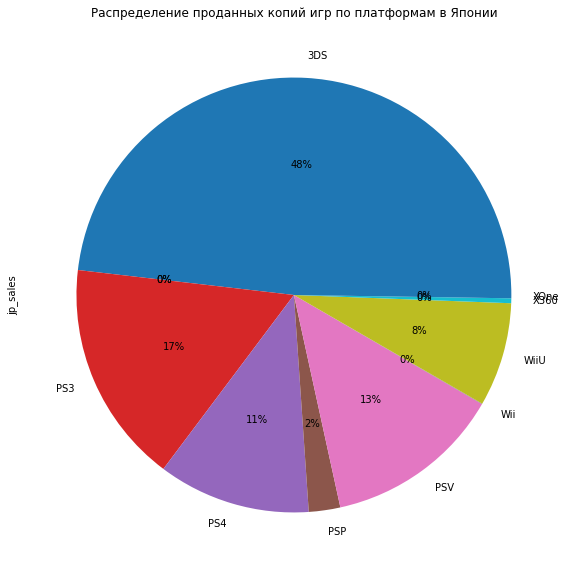

In [67]:
df_act.groupby(['platform']).sum().plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по платформам в Японии', figsize = (10,10), legend = False)

total_jp = df_act['jp_sales'].sum()
print(f'Общее количество проданных игр для Европы составляет {total_jp} млн копий, при этом:')

jp_3ds_part = (67.81 / total_jp).round(3)*100
print(f'-Доля проданных игр на Nintendo 3Ds составляет {jp_3ds_part}% от общего количества проданных копий игр;')

jp_ps3_part = (23.35 / total_jp).round(3)*100
print(f'-Доля проданных игр на PlayStation 3 составляет {jp_ps3_part}% от общего количества проданных копий игр;')

jp_psv_part = (18.59 / total_jp).round(3)*100
print(f'-Доля проданных игр на PlayStation Vita составляет {jp_psv_part}% от общего количества проданных копий игр;')

jp_ps4_part = (15.96 / total_jp).round(3)*100
print(f'-Доля проданных игр на PlayStation 4 составляет {jp_ps4_part}% от общего количества проданных копий игр;')

jp_wiiu_part = (10.88 / total_jp).round(3)*100
print(f'-Доля проданных игр на Nintendo WiiU составляет {jp_wiiu_part}% от общего количества проданных копий игр.')



Из общего графика видно, что японские игроки все-таки предпочитают отечественные платформы для гейминга - консоли от Microsoft со своими значениями меньше 0.01% заметно проигрывают японским от Sony и Nintendo.

Давайте посмотрим - какие жанры предпочитают японцы.

In [68]:
jp_top_gen = df_act.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = ['jp_sales'], ascending=False)
jp_top_gen.head(5)#создадим переменную "топ жанров в Японии" и построим сводную таблицу

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Text(0, 0.5, 'Количество проданных игр')

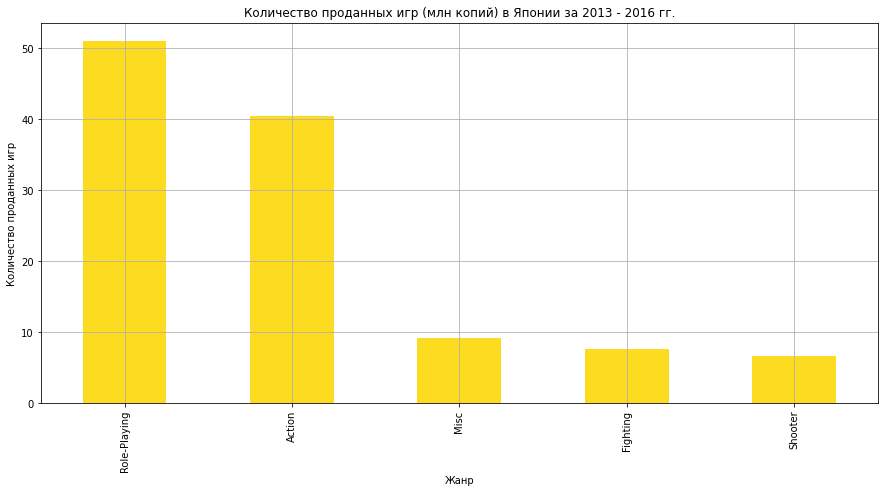

In [69]:
jp_top_gen.head(5).plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#FDDB20')
plt.title('Количество проданных игр (млн копий) в Японии за 2013 - 2016 гг.')
plt.xlabel('Жанр') 
plt.ylabel('Количество проданных игр')

Здесь все совсем по-другому. В противовес американскому и европейскому пользователю, пользователь из Японии предпочитает жанр РПГ(51 млн копий игр этого жанра прдано). Жанр экшн занимает 2 место в нашей пятерке с почти 40,5 млн продаж. Также у японцев присутствует жанр "драк" в лидерах - действительно, почти все знаменитые тайтлы этого жанра разрабатывались в Японии и хорошо там прижились.

Это можно объяснить тем, что Япония по сути является родоначальником РПГ жанра и жанра драк, а также определенным своеобразным характером японских геймеров. Итого у нас получается, что типичный японский геймер - это игрок на консолях Nintendo/Sony, предпочитающий ролевой жанр игр. А что с рейтингом ESRB?

In [70]:
jp_top_rate = df_act.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = ['jp_sales'], ascending=False)
jp_top_rate #создаем и выводим перменную "топ жанров в Японии"

,jp_sales
rating,
NR,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


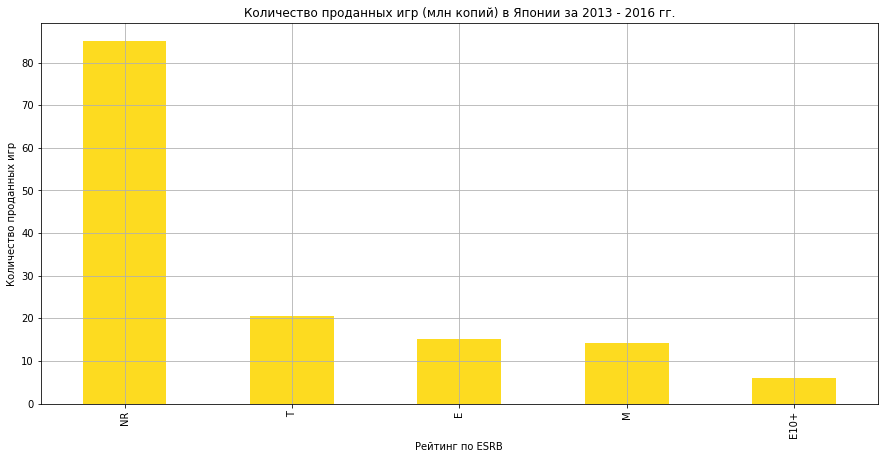

<AxesSubplot:title={'center':'Распределение проданных копий игр по рейтингу ESRB в Японии'}, ylabel='jp_sales'>

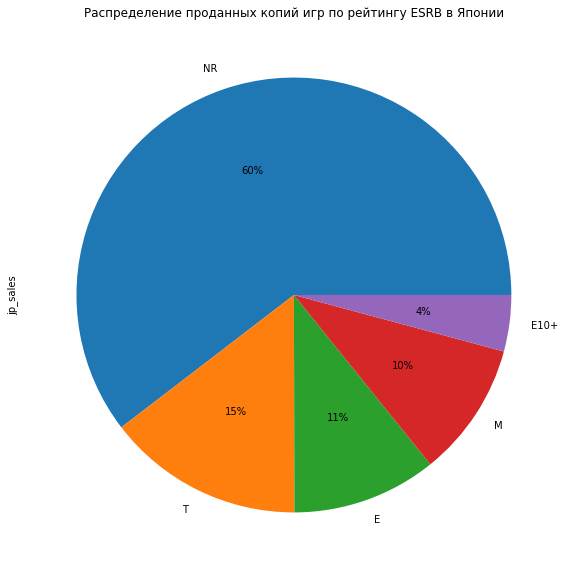

In [71]:
jp_top_rate.plot(kind='bar', figsize = (15, 7), legend = False, grid = True, color='#FDDB20')
plt.title('Количество проданных игр (млн копий) в Японии за 2013 - 2016 гг.')
plt.xlabel('Рейтинг по ESRB') 
plt.ylabel('Количество проданных игр')
plt.show()

jp_top_rate.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',
 title='Распределение проданных копий игр по рейтингу ESRB в Японии', figsize = (10,10), legend = False)

Очень много данных здесь не получится проанализировать - в изначальном датасете пропуски находятся в рейтингах. На это стоит обратить внимание при составлении таких датасетов в будущем.

Из того, что мы видим - преобладают игры жантра "для подростков" (15% рынка) и "для всех" (11%). Действительно, это говорит о культуре японского гейминга - в ролевых играх, занимающих 1 место у японцев, рейтинг почти всегда "для всех".

Таким образом, японский геймер - это, можно сказать, патриот, играющий в подавляющем большинстве случаем на отечественных консолях Sony/Nintendo в рпг игры, рейтинг которых по классификации ESBR - 'Т' и 'Е'.

Интересно отметить, что на японском рынке в топе - портативная консоль 3Ds, а также PS Vita. Две эти приставки совсем не популярны в остальном мире, но хорошо прижились в Японии и показывают отличные продажи игр на них. То есть, дополнительно можно сказать, что японский геймер - это геймер на портативной консоли.

Итак, мы получили портреты типичных пользователей из трех разных регионов - Северной Америки, Европы и Японии.

## Проверка гипотез

### Гипотеза 1

Перед нами следующая гипотеза:

    "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"


Для формулирования альтернативной гипотезы необходимо сначала понять какой она будет - односторонней или двусторонней. По сути - нам интересно равны рейтинги или нет. Предлагаю выбрать двустороннюю альтернативную гипотезу, так как может быть несколько исходов - значения рейтинга пользователей на XBox может быть как меньше значения рейтинга пользователей на РС, так и наоборот. Нулевая же гипотеза предполагает только то, что они равны, и  будет сформулирована как "среднее одной генеральной совокупности (средняя оценка пользователей игр на XBox One) равно среднему другой генеральной совокупности (средняя оценка пользователей игр на РС)". Альтернативная гипотеза тогда будет утверждать наоборот - среднее одной генеральной совокупности не равно среднему другой. Звучать это будет так: 

H₀: Средние пользовательские рейтиги платформ Xbox One и PC одинаковые

H₁: Средние пользовательские рейтиги платформ Xbox One и PC не одинаковые

Для проверки данной гипотезы будем пользоваться t-тестом для среднего двух генеральных совокупностей. Но для начала оценим масштаб (количество строк) каждой из выборок - платформы XBox One и РС. Это важно, т.к. для разных по размеру выборок дисперсии также будут отличаться, а соответтсвенно, тест сработает некорректно.

In [72]:
len(df_act[df_act['platform']=='PC'].index)#количество строк с платформой РС

189

In [73]:
len(df_act[df_act['platform'] == 'XOne'].index)#количество строк с платформой XBox One

247

Как можно заметить - совокупности отличаются, поэтому параметр equal_var t-теста укажем с False.

Создадим две переменных - их будем использовать в качестве генеральных совокупностей в нашем t-тесте. Переменная xone_score будет содержать столбец user_score датафрейма со значением соответствующего значения платформы - XBox One. Переменная pc_score будет соержать тот же столбец датафрейма, но с соответствующим зачение платформы - РС.

In [74]:
xone_score = df_act[df_act['platform'] == 'XOne']["user_score"]
xone_score

99       NaN
165      7.9
179      5.4
241      6.4
269      6.2
        ... 
16359    8.2
16372    6.6
16374    NaN
16389    6.7
16401    0.0
Name: user_score, Length: 247, dtype: float64

In [75]:
pc_score = df_act[df_act['platform'] == 'PC']['user_score']
pc_score


455      3.9
1084     7.9
1337     2.2
1423     6.0
1515     5.4
        ... 
16239    7.9
16248    1.4
16346    NaN
16360    NaN
16421    7.6
Name: user_score, Length: 189, dtype: float64

In [76]:
pc_score.isna().sum() #проверим совокупность на предмет пропусков - они будут нам мешать

29

29 пропусков из 189 строк - много, но их нельзя заменить никаким числовым значением, а значит придется удалять.

In [77]:
pc_score = pc_score.dropna()
pc_score = pc_score.reset_index(drop=True)

In [78]:
pc_score.isna().sum() #проверили - пропусков больше нет.

0

In [79]:
xone_score.isna().sum() #аналогично поступим с другой совокупностью

54

In [80]:
xone_score = xone_score.dropna()
xone_score = xone_score.reset_index(drop=True)

In [81]:
xone_score.isna().sum() 

0

Критический уровень статистической значимости (alpha) примем за 0,01, т.к. обе генеральные совокупности большие - 247 и 189 значений в каждой. Нам важно исключить ошибку первого рода (т.е. не ошибиться с опровержением нулевой гипотезы).

In [82]:
alpha = .01

results = st.ttest_ind(
    xone_score, 
    pc_score,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.7263951389486794

Не получилось отвергнуть нулевую гипотезу


Р-значение, равное ~0,72 говорит нам о том, что наша нулевая гипотеза о том, что средние пользовательские рейтиги платформ Xbox One и PC одинаковые, не отвергается.

### Гипотеза 2

    Средние пользовательские рейтинги жанров Action и Sports разные

Здесь нам предлагается опять же сравнить средние значения двух совокупностей - оценки пользователей игр жанра экшн и жанра спорт. Нулевая гипотеза также будет выглядеть, как "средние двух генеральных совокупностей равны между собой". Альтернативная гипотеза в данном случае может быть только одна - средние этих совокупностей не равны. Сформулируем гипотезы:

H₀: Средние пользовательские рейтинги жанров Action и Sports равны между собой

H₁: Средние пользовательские рейтинги жанров Action и Sports не равны между собой

Так же будем пользоваться t-тестом, но для начала оценим размеры совокупностей и проверим их на предмет пропусков.

In [83]:
len(df_act[df_act['genre']=='Action'].index)#количество строк с играми жанра экшн

766

In [84]:
len(df_act[df_act['genre']=='Sports'].index)#количество строк с играми жанра спорт

214

Совокупности различаются больше, чем на 500 строк - параметр equal_var примет значение False.

In [85]:
action_score = df_act[df_act['genre']=='Action']['user_score']
action_score

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16409    NaN
16420    NaN
16421    7.6
16428    NaN
16439    NaN
Name: user_score, Length: 766, dtype: float64

In [86]:
action_score = action_score.dropna().reset_index(drop=True)
action_score

0      8.2
1      8.1
2      8.3
3      9.1
4      7.9
      ... 
427    8.5
428    5.1
429    6.7
430    0.0
431    7.6
Name: user_score, Length: 432, dtype: float64

In [87]:
sports_score = df_act[df_act['genre']=='Sports']['user_score']
sports_score

77       4.3
94       5.0
126      4.3
143      5.7
263      4.5
        ... 
16160    NaN
16181    4.5
16248    1.4
16367    0.0
16372    6.6
Name: user_score, Length: 214, dtype: float64

In [88]:
sports_score = sports_score.dropna().reset_index(drop=True)
sports_score

0      4.3
1      5.0
2      4.3
3      5.7
4      4.5
      ... 
168    6.9
169    4.5
170    1.4
171    0.0
172    6.6
Name: user_score, Length: 173, dtype: float64

Также, как и в предыдущей гипотезе, предлагаю отвергать нулевую гипотезу, если р-значение будет меньше 0,001.

In [89]:
alpha = .01

results = st.ttest_ind(
    action_score, 
    sports_score,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.947118399375673e-10

Отвергаем нулевую гипотезу


Отвержение нулевой гипотезы подтверждает тезис, предложенный в самом начале. То есть, действительно, средние пользовательские рейтинги жанров Action и Sports разные.

## Вывод

Итак, мы проанализировали данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

Перед анализом мы ознакомились с данными, вызвали графики для каждого столбца, у нас получилась следующая картина:
- датасет состоит из 16175 строк (игр)
- в датасете имеются пропуски - достаточно много значений пропущено в столбцах с оценками и рейтингом
- названия столбцов датасета начинаются с заглавной буквы - для написания кода это не очень удобно
- полных дубликатов строк в датасете нет
- типы данных в столбцах год, оценка критиков, рейтинг также некорректны - это тоже необходимо исправить
Для подготовки данных к анализу мы привели их в удобный для работы и восприятия вид: 
- привели названия колонок к одному регистру, 
- исправили типы данных с дробных на целые/строк на числа, 
- выявили и заполнили пропущенные значения (где возможно, а где невозможно - удалили строки с пропусками, чтобы вдальнейшем они нам не мешали при анализе)
Также мы добавили в датафрейм новый столбе "общие продажи", который объединил в себе количество проданных копий игр по всем регионам - этот столбец нам очень пригодится во время анализа.

Стоит отметить, что пропуски в рейтингах (замемненные нами на свое значение), а также пропуски в оценки крайне неудобны, но избавиться от них нельзя. Необходимо более качественно заполнять данные, чтобы анализ был точнее.

Затем мы провели исследовательский анализ данных, чтобы ответить на стоящие перед нами вопросы. Вот какие выводы мы получили:
- Пик выхода свежих игр приходится на 2007 - 2010 года, но для дальнейшего анализа мы взяли срез с 2013 по 2016 год, т.к. срок в 4 года является самым наглядным, а наш период для прогноза продаж в 2017 году будет с 2013 по 2016 гг. (а 4-й 2017 год актуального периода как раз и будет прогнозируемым).
- Лидерами по количеству проданных копий являются платформы PS2, Xbox360, PS3, Wii, PS. Средний срок жизни одной платформы составляет около 5-6 лет. Но эти платформы лидеры в разрезе всего датафрейма - некоторые из них поддерживались больше 20 лет, соответственно, на них и покупались игры чаще. Мы также отметили важную деталь - в 80-е, 90-е годы, ввиду не сильно развитых технологий, новые платформы появлялись реже (например, NES от Nintendo существовала около 10 лет) а затем, когда новые поколения платформ стали выходить чаще, срок изни платформы усреднился и пришел как раз к нашему выявленному значению в 5-6 лет. 
- Исходя из данных мы выделили актуальных лидеров - это консоли PlayStation 4 от Sony и XBox One от Microsoft. По количеству проданных игр лидирует PS4 от Sony - 118,9 млн копий против 60,1 млн у Xbox One. В среднем, PS4 также опережает Xbox One больше, чем в 2 раза по количеству проданных на нее тайтлов - 78,5 млн против 39,8 млн копий. Это говорит о безусловно большей популярности консоли от Sony среди геймеров по всему миру, а таже о большем количестве эксклюзивов, вышедших именно на эту консоль. Также это подтверждает построенный нами "ящик с усами" - так, количество выбросов, болешее у Sony, говорит нам о том, что некоторые тайтлы продавались и "выстреливали" хорошо только на ней. По остальным данным также видно, что PlayStation 4 опережает своего конкурента от Microsoft в 2 раза.
- Нашли зависимость объема продаж игр от оценки критиков и пользователей, используя коэфициент корреляции. Так, получилось, что люди охотнее покупают игры с высокими оценками от критиков, а вот с зависимостью от оценок пользователей взаимосвязь слабая - это можно списать на то, что оценка пользователя вещь субъективная, и не каждый геймер не по каждой игре будет отталкиваться перед покупкой от нее. Об этом говорят коэффициенты, полученные нами для одной из самых популярных актуальных платформ - Sony PlayStation 4 (рассчитанный коэффициент корреляции (0,41) указывает, что прослеживается взависимость количества проданных копий игр на консоль PS4 от оценки данных игр критиками, а вот близкий к нулю коэффициент корреляции (0,02) свидетельствует о незначительной зависимости количества проданных копий тайтлов от их оценки пользователями).
- Выяснили, что наиболее прибыльные (продаваемые) жанры игр -  шутеры (их средние продажи 1,24 млн копий), спорт-симуляторы (0,7 млн проданных копий) и платформеры(с 0,57 млн проданных копий в среднем). Наименьшей популярностью пользуются стратегии (0,18 млн), паззлы 0,186 млн копий) и приключения(0,09 млн проданных копий).

Таким образом получилось, что в прогнозируемом периоде для увеличения продаж стоит отдать предпочтения играм для Sony PlayStation 4 и Microsoft XBox One, при этом рекомендуем акцент ставить на жанры шутеров, спортивных симуляторов и платформеров. Также не лишним будет продавать болшее количество игр на PS4, так как она пользуется высокой популярностью у геймеров (игры на нее продаются лучше, как показывает анализ). Дополнительно можно сказать, что было бы неплохо провести анализ зависимости продаж игр от их возрастного рейтинга, а также по франшизам - это могло бы помочь более детально спрогнозировать продажи на будущий год.

Также мы составили портреты пользователей из разных предоставленных для анализа регионов.
- Североамериканский геймер скорее всего человек, играющий на консоли (PS46 Xbox One, XBox 360), которому нравятся жанры экшн-шутеров, либо спортивных симуляторов (реже РПГ), предпочитающий игры рейтинга "для взрослых" (как раз подходит к любви американцев к "стрелялкам"), либо игры рейтинга "для всех" (отлично вписывается в спортивные симуляторы и РПГ).
- Европейский игрок играет на PS4/3 (реже XBox One/360), преимущественно в экшены, шутеры, спортивные симуляторы, но не обходит стороной и гонки (в отличие от североамериканского пользователя), а также покупает игры преимущественно категории "для взрослых", либо же "для всех" (гораздо меньше - категории "для подростков").
- Пользователь из Японии - это, можно сказать, патриот, играющий играющий в подавляющем большинстве случаем на отечественных консолях Sony/Nintendo в рпг игры, рейтинг которых по классификации ESBR - 'Т' и 'Е'. Также мы отметили, что на японском рынке в топе - портативная консоль 3Ds, а также PS Vita. Две эти приставки совсем не популярны в остальном мире, но хорошо прижились в Японии и показывают отличные продажи игр на них. То есть, дополнительно можно сказать, что японский геймер - это геймер на портативной консоли.

Данная информация также может помочь оптимизировать и нарастить продажи нашего магазина для разных регионов.

Помимо этого мы сформулировали и проверили две гипотезы с помощью t-тестов и р-значений. 
- Первая пара гипотез (нулевая и альтернативная) звучали так:

H₀: Средние пользовательские рейтиги платформ Xbox One и PC одинаковые

H₁: Средние пользовательские рейтиги платформ Xbox One и PC не одинаковые

Используя t-тест и значение альфа 0,01 (так как совокупности необходимые для проверки достаточно большие) было получено р-значение, равное 0,72, что позволяет отвергнуть нулевую гипотезу и сказать, что средние пользовательские рейтиги платформ Xbox One и PC не одинаковые.

- Вторая пара была следующая:

H₀: Средние пользовательские рейтинги жанров Action и Sports не равны между собой

H₁: Средние пользовательские рейтинги жанров Action и Sports равны между собой

Аналогично, используя t-test и значение альфа равное 0,01 (так как, аналогично, совокупности необходимые для проверки достаточно большие) получили р-значение, равное 3.947118399375673e-10, что также позволяет отвергнуть нулевую гипотезу и сказать, что средние пользовательские рейтинги жанров Action и Sports разные. 

